# Поиск аномалий

## Загрузка данных

In [ ]:
import pandas as pd

Файл с данными в формате csv размещен на Google Drive. Файл большой, поэтому прямую ссылку получить невозможно из-за страницы предупреждения о том, что файл не удалось проверить на наличие вирусов.

Обойти страницу предупреждения можно с помощью gdown.

In [ ]:
!pip install gdown

In [ ]:
import gdown

gdown.download('https://drive.google.com/uc?id=1YiJP-oiZrtGdIAEfeFatkpd8FuW7K00T', 'data.csv')

Downloading...
From: https://drive.google.com/uc?id=1YiJP-oiZrtGdIAEfeFatkpd8FuW7K00T
To: /content/data.csv
100%|██████████| 138M/138M [00:01<00:00, 137MB/s]


'data.csv'

Данные имеют следующий вид.

Таким образом датасет представляет собой список записей из какого-то журнала событий.

Видно, что все столбцы, по сути, являются категориальными.

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,object.storage.id,object.storage.name,object.storage.fullpath,object.storage.path,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
0,9103,\\*\imap4,imap42022032202-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-28T00:53:58Z
1,172344,\\*\regJournal,erp_20220316103959.json,P:\regJournal\erp_20220316103959.json,P:\regJournal\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-17T00:05:23Z
2,5287,\\*\W3SVC1,u_ex190827.log,C:\inetpub\logs\LogFiles\W3SVC1662173573\u_ex1...,C:\inetpub\logs\LogFiles\W3SVC1662173573\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-18T00:03:19Z
3,1627778,\\*\w3svc2,u_ex220222_x.log,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,c:\inetpub\logs\logfiles\w3svc649309461\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-04-07 13:02:35+00:00
4,399841,\\*\imap4,imap42022031713-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-28T01:18:14Z


## Предобработка

### Заполнение пропусков

Данные имеют пропуски. При этом, судя по всему, в данном случае пропуски не являются признаком "загрязненности" данных, а сам факт пропуска несет информацию о событии.

Заполним все пропуски датасета значениями "Missing".

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               500016 non-null  int64 
 1   object.storage.id        471685 non-null  object
 2   object.storage.name      471685 non-null  object
 3   object.storage.fullpath  471685 non-null  object
 4   object.storage.path      471685 non-null  object
 5   src.ip                   490915 non-null  object
 6   subject.account.id       500016 non-null  object
 7   subject.account.domain   500016 non-null  int64 
 8   event_src.host           500016 non-null  int64 
 9   src.asset                488733 non-null  object
 10  datafield6               500011 non-null  object
 11  time                     500016 non-null  object
dtypes: int64(3), object(9)
memory usage: 45.8+ MB


In [ ]:
data.fillna('Missing', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               500016 non-null  int64 
 1   object.storage.id        500016 non-null  object
 2   object.storage.name      500016 non-null  object
 3   object.storage.fullpath  500016 non-null  object
 4   object.storage.path      500016 non-null  object
 5   src.ip                   500016 non-null  object
 6   subject.account.id       500016 non-null  object
 7   subject.account.domain   500016 non-null  int64 
 8   event_src.host           500016 non-null  int64 
 9   src.asset                500016 non-null  object
 10  datafield6               500016 non-null  object
 11  time                     500016 non-null  object
dtypes: int64(3), object(9)
memory usage: 45.8+ MB


### Удаление столбца Unnamed: 0

Столбец Unnamed: 0 очень похож на индекс. Удалим его.

In [ ]:
data['Unnamed: 0'].is_unique

False

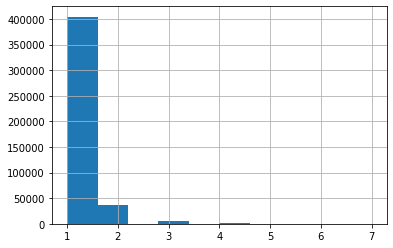

In [ ]:
data['Unnamed: 0'].value_counts().hist()

In [ ]:
s = data.duplicated()
s[s]

Series([], dtype: bool)

In [ ]:
duplicated_unnamed = data['Unnamed: 0'].duplicated(keep=False)
data[duplicated_unnamed].sort_values('Unnamed: 0')

,Unnamed: 0,object.storage.id,object.storage.name,object.storage.fullpath,object.storage.path,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
143260,0,\\*\w3svc1,u_ex22030722_x.log,c:\inetpub\logs\logfiles\w3svc1\u_ex22030722_x...,c:\inetpub\logs\logfiles\w3svc1\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,199,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
359599,0,\\*\w3svc2,u_ex220109_x.log,c:\inetpub\logs\logfiles\w3svc34578\u_ex220109...,c:\inetpub\logs\logfiles\w3svc34578\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,224,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-25T00:33:55Z
267916,1,\\*\w3svc1,u_ex201105.log,c:\inetpub\logs\logfiles\w3svc1\u_ex201105.log,c:\inetpub\logs\logfiles\w3svc1\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,279,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-20T00:49:22Z
438322,1,\\*\Imap4,IMAP42022030710-1.LOG,C:\Program Files\Microsoft\Exchange Server\V15...,C:\Program Files\Microsoft\Exchange Server\V15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,198,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-17T00:25:23Z
447850,5,\\*\w3svc1,u_ex201215.log,c:\inetpub\logs\logfiles\w3svc1\u_ex201215.log,c:\inetpub\logs\logfiles\w3svc1\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,279,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-20T00:49:22Z
...,...,...,...,...,...,...,...,...,...,...,...,...
139251,465411,\\*\imap4,imap4be2022032520-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,200,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-28T02:16:32Z
44067,465437,\\*\imap4,imap4be2022031908-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,200,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-28T02:16:32Z
218399,465437,\\*\w3svc2,u_ex211120_x.log,c:\inetpub\logs\logfiles\w3svc34578\u_ex211120...,c:\inetpub\logs\logfiles\w3svc34578\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,223,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-04-07 14:11:17+00:00
314176,465439,\\*\imap4,imap4be2022031921-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,200,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-28T02:16:32Z


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   object.storage.id        500016 non-null  object
 1   object.storage.name      500016 non-null  object
 2   object.storage.fullpath  500016 non-null  object
 3   object.storage.path      500016 non-null  object
 4   src.ip                   500016 non-null  object
 5   subject.account.id       500016 non-null  object
 6   subject.account.domain   500016 non-null  int64 
 7   event_src.host           500016 non-null  int64 
 8   src.asset                500016 non-null  object
 9   datafield6               500016 non-null  object
 10  time                     500016 non-null  object
dtypes: int64(2), object(9)
memory usage: 42.0+ MB


### Создание новых признаков

#### Столбец time

Отконвертируем тип столбца time в datetime.

In [ ]:
data['time'] = pd.to_datetime(data['time'])
data.head()

,object.storage.id,object.storage.name,object.storage.fullpath,object.storage.path,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
0,\\*\imap4,imap42022032202-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-28 00:53:58+00:00
1,\\*\regJournal,erp_20220316103959.json,P:\regJournal\erp_20220316103959.json,P:\regJournal\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-17 00:05:23+00:00
2,\\*\W3SVC1,u_ex190827.log,C:\inetpub\logs\LogFiles\W3SVC1662173573\u_ex1...,C:\inetpub\logs\LogFiles\W3SVC1662173573\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-18 00:03:19+00:00
3,\\*\w3svc2,u_ex220222_x.log,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,c:\inetpub\logs\logfiles\w3svc649309461\,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-04-07 13:02:35+00:00
4,\\*\imap4,imap42022031713-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,2022-03-28 01:18:14+00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   object.storage.id        500016 non-null  object             
 1   object.storage.name      500016 non-null  object             
 2   object.storage.fullpath  500016 non-null  object             
 3   object.storage.path      500016 non-null  object             
 4   src.ip                   500016 non-null  object             
 5   subject.account.id       500016 non-null  object             
 6   subject.account.domain   500016 non-null  int64              
 7   event_src.host           500016 non-null  int64              
 8   src.asset                500016 non-null  object             
 9   datafield6               500016 non-null  object             
 10  time                     500016 non-null  datetime64[ns, UTC]
dtypes: datetime64

Из столбца time выделим 2 новых признака: день недели и час.

In [ ]:
data['day_of_week'] = data['time'].dt.dayofweek

Количество событий сильно различается в разные дни недели. Большая часть событий почему-то произошла в четверг. Сложно сказать, связано это с особенностями предметной области или с особенностями выборки.

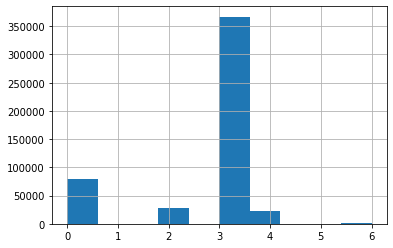

In [ ]:
data['day_of_week'].hist()

In [ ]:
data['hour'] = data['time'].dt.hour

Количество событий сильно различается и в разные часы. Большая часть событий произошла в полночь, в 12, 13 и 14 часов. С 15 до 23 часов событий нет вообще. Здесь тоже сложно сказать, связано это с особенностями предметной области или с особенностями выборки.

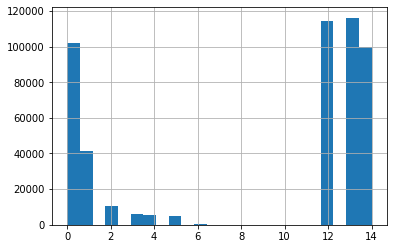

In [ ]:
data['hour'].hist(bins=24)

Столбец time больше не нужен, удалим его.

In [ ]:
data.drop('time', axis=1, inplace=True)

#### Подготовка датасета к дальнейшей обработке

Преобразуем весь датасет к нижнему регистру.

In [ ]:
object_columns = data.select_dtypes(['object']).columns
for column in object_columns:
    data[column] = data[column].str.lower()
data.head()

,object.storage.id,object.storage.name,object.storage.fullpath,object.storage.path,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,day_of_week,hour
0,\\*\imap4,imap42022032202-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0
1,\\*\regjournal,erp_20220316103959.json,p:\regjournal\erp_20220316103959.json,p:\regjournal\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0
2,\\*\w3svc1,u_ex190827.log,c:\inetpub\logs\logfiles\w3svc1662173573\u_ex1...,c:\inetpub\logs\logfiles\w3svc1662173573\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0
3,\\*\w3svc2,u_ex220222_x.log,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,c:\inetpub\logs\logfiles\w3svc649309461\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13
4,\\*\imap4,imap42022031713-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1


Заменим все точки в названиях столбцов на _. Это сделано, так как точки в названиях столбцов могут привести к сложностям, например, в query.

In [ ]:
data.columns = map(lambda column: column.replace('.', '_'), data.columns)
data.head()

,object_storage_id,object_storage_name,object_storage_fullpath,object_storage_path,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour
0,\\*\imap4,imap42022032202-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0
1,\\*\regjournal,erp_20220316103959.json,p:\regjournal\erp_20220316103959.json,p:\regjournal\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0
2,\\*\w3svc1,u_ex190827.log,c:\inetpub\logs\logfiles\w3svc1662173573\u_ex1...,c:\inetpub\logs\logfiles\w3svc1662173573\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0
3,\\*\w3svc2,u_ex220222_x.log,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,c:\inetpub\logs\logfiles\w3svc649309461\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13
4,\\*\imap4,imap42022031713-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1


#### Путь к файлу

##### Расширение файла

Создадим столбец, в котором будет содержаться расширение файла, или пустая строка, если расширения нет.

In [ ]:
import numpy as np
import os

@np.vectorize
def extension_from_filename(filename: str):
    filename, file_extension = os.path.splitext(filename)
    return file_extension

In [ ]:
data['file_extension'] = extension_from_filename(data['object_storage_name'])
data.head()

,object_storage_id,object_storage_name,object_storage_fullpath,object_storage_path,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension
0,\\*\imap4,imap42022032202-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0,.log
1,\\*\regjournal,erp_20220316103959.json,p:\regjournal\erp_20220316103959.json,p:\regjournal\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0,.json
2,\\*\w3svc1,u_ex190827.log,c:\inetpub\logs\logfiles\w3svc1662173573\u_ex1...,c:\inetpub\logs\logfiles\w3svc1662173573\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0,.log
3,\\*\w3svc2,u_ex220222_x.log,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,c:\inetpub\logs\logfiles\w3svc649309461\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13,.log
4,\\*\imap4,imap42022031713-1.log,c:\program files\microsoft\exchange server\v15...,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1,.log


In [ ]:
data['file_extension'].value_counts()

.log                              370278
                                  100333
.json                               7016
.xlsx                               2093
.sql                                1785
                                   ...  
.blue_thermite_targeting_japan         1
.28                                    1
.30319                                 1
. актив совладельцев ао                1
.2252                                  1
Name: file_extension, Length: 866, dtype: int64

##### Удаление лишних столбцов

Как и следовало ожидать, полный путь является конкатенацией пути к папке файла и имени файла.

In [ ]:
data.query('(not object_storage_path + object_storage_name == object_storage_fullpath) and (not object_storage_path == object_storage_name == object_storage_fullpath == "missing")', engine='python')

,object_storage_id,object_storage_name,object_storage_fullpath,object_storage_path,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension


Поэтому столбцы object_storage_name и object_storage_path нам не нужны, удалим их.

In [ ]:
data.drop(['object_storage_name', 'object_storage_path'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   object_storage_id        500016 non-null  object
 1   object_storage_fullpath  500016 non-null  object
 2   src_ip                   500016 non-null  object
 3   subject_account_id       500016 non-null  object
 4   subject_account_domain   500016 non-null  int64 
 5   event_src_host           500016 non-null  int64 
 6   src_asset                500016 non-null  object
 7   datafield6               500016 non-null  object
 8   day_of_week              500016 non-null  int64 
 9   hour                     500016 non-null  int64 
 10  file_extension           500016 non-null  object
dtypes: int64(4), object(7)
memory usage: 42.0+ MB


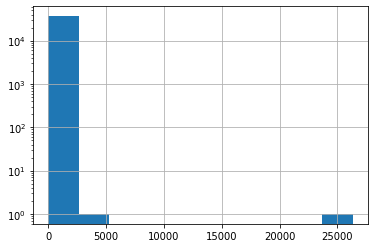

In [ ]:
fullpaths = data['object_storage_fullpath']
fullpaths = fullpaths[fullpaths != 'missing']
fullpaths.value_counts().hist(log=True)

##### Тип пути

В датасете представлены полные пути нескольких разных типов.

Первый тип — полный путь Windows, начинающийся с названия диска.

In [ ]:
#data.query(r'not object_storage_fullpath.str.contains(r"^[a-z]:\\")', engine='python')
windows_fullpath = data['object_storage_fullpath'].str.contains(r"^[a-z]:\\")
len(windows_fullpath[windows_fullpath])

444689

In [ ]:
data[windows_fullpath].head()

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension
0,\\*\imap4,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0,.log
1,\\*\regjournal,p:\regjournal\erp_20220316103959.json,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0,.json
2,\\*\w3svc1,c:\inetpub\logs\logfiles\w3svc1662173573\u_ex1...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0,.log
3,\\*\w3svc2,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13,.log
4,\\*\imap4,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1,.log


Второй тип — пропуски.

In [ ]:
missing_fullpath = data['object_storage_fullpath'] == 'missing'
len(missing_fullpath[missing_fullpath])

28331

In [ ]:
data[~windows_fullpath & ~missing_fullpath]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension
6,\\*\ipc$,\lsarpc,10.31.10.54,s-1-5-21-1023191730-727829927-3985050192-42052,26,190,163b2601-e780-0001-0000-000000000140,0x12019f,3,14,
22,\\*\ipc$,\spoolss,10.0.64.26,s-1-5-21-1023191730-727829927-3985050192-39625,26,213,1457bbc3-0900-0001-0000-000000001394,0x12019f,3,13,
67,\\*\ipc$,\spoolss,10.31.4.149,s-1-5-21-1023191730-727829927-3985050192-40118,26,213,1457bbff-21c0-0001-0000-00000000147a,0x12019f,3,12,
92,\\*\ipc$,\spoolss,10.0.100.12,s-1-5-21-1023191730-727829927-3985050192-36520,26,213,1457bbbf-8280-0001-0000-000000001304,0x12019f,0,0,
98,\\*\ipc$,\spoolss,10.0.76.137,s-1-5-21-1023191730-727829927-3985050192-3167,26,213,1457bbb6-2e00-0001-0000-00000000111c,0x12019f,3,14,
...,...,...,...,...,...,...,...,...,...,...,...
499974,\\*\ipc$,\spoolss,10.0.100.65,s-1-5-21-1023191730-727829927-3985050192-37700,26,213,1457bbbf-6480-0001-0000-0000000012f9,0x12019f,3,13,
499991,\\*\ipc$,\spoolss,10.0.102.24,s-1-5-21-1023191730-727829927-3985050192-3408,26,213,1457bbaf-7880-0001-0000-00000000100e,0x12019f,3,12,
500006,\\*\ipc$,\svcctl,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x3,3,12,
500011,\\*\ipc$,\svcctl,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x3,3,12,


Третий тип — пути, начинающиеся с \.

In [ ]:
backslash_fullpath = data['object_storage_fullpath'].str.contains(r"^\\")
len(backslash_fullpath[backslash_fullpath])

26996

Других типов путей в датасете не представлено.

In [ ]:
data[~windows_fullpath & ~backslash_fullpath & ~missing_fullpath]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension


In [ ]:
#data.query(r'object_storage_fullpath.str.contains(r"^\\")', engine='python')

На основе этого разделения полных путей на типы создадим новый столбец.

In [ ]:
data.loc[windows_fullpath, 'fullpath_type'] = 'windows'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   object_storage_id        500016 non-null  object
 1   object_storage_fullpath  500016 non-null  object
 2   src_ip                   500016 non-null  object
 3   subject_account_id       500016 non-null  object
 4   subject_account_domain   500016 non-null  int64 
 5   event_src_host           500016 non-null  int64 
 6   src_asset                500016 non-null  object
 7   datafield6               500016 non-null  object
 8   day_of_week              500016 non-null  int64 
 9   hour                     500016 non-null  int64 
 10  file_extension           500016 non-null  object
 11  fullpath_type            444689 non-null  object
dtypes: int64(4), object(8)
memory usage: 45.8+ MB


In [ ]:
data.loc[backslash_fullpath, 'fullpath_type'] = 'backslash'

In [ ]:
data.loc[missing_fullpath, 'fullpath_type'] = 'missing'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   object_storage_id        500016 non-null  object
 1   object_storage_fullpath  500016 non-null  object
 2   src_ip                   500016 non-null  object
 3   subject_account_id       500016 non-null  object
 4   subject_account_domain   500016 non-null  int64 
 5   event_src_host           500016 non-null  int64 
 6   src_asset                500016 non-null  object
 7   datafield6               500016 non-null  object
 8   day_of_week              500016 non-null  int64 
 9   hour                     500016 non-null  int64 
 10  file_extension           500016 non-null  object
 11  fullpath_type            500016 non-null  object
dtypes: int64(4), object(8)
memory usage: 45.8+ MB


#### Столбец src_ip

Рассмотрим столбец src_ip.

In [ ]:
data[data['src_ip'] != 'missing'].sort_values('src_ip')

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type
363444,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x160197,3,13,.pdf,windows
286303,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x100081,3,13,,windows
31643,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x160197,3,13,.pdf,windows
233490,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x100081,3,13,,windows
67968,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x2,3,13,.pdf,windows
...,...,...,...,...,...,...,...,...,...,...,...,...
11653,missing,missing,fe80::f035:70f2:92d6:80e1,s-1-5-21-1023191730-727829927-3985050192-40689,26,203,missing,network,2,3,,missing
473264,missing,missing,fe80::f035:70f2:92d6:80e1,s-1-5-21-1023191730-727829927-3985050192-40691,26,203,missing,network,2,5,,missing
450161,missing,missing,fe80::f035:70f2:92d6:80e1,s-1-5-21-1023191730-727829927-3985050192-40219,26,203,missing,network,2,2,,missing
58003,missing,missing,fe80::f035:70f2:92d6:80e1,s-1-5-21-1023191730-727829927-3985050192-40690,26,203,missing,network,2,0,,missing


##### Версия IP-адреса

Столбец src_ip содержит адреса IPv4, IPv6, и пропуски. На основе этого создадим новый столбец.

In [ ]:
ipv4 = data['src_ip'].str.contains(r'\.')
data[ipv4].sort_values('src_ip')

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type
372498,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x100081,3,13,,windows
23104,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x100081,3,12,,windows
26720,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x17019f,3,13,.pdf,windows
233490,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x100081,3,13,,windows
318249,\\*\office,d:\office\administrative department\подразделе...,10.0.100.103,s-1-5-21-1023191730-727829927-3985050192-41725,26,190,159a4118-cdc0-0001-0000-000000000142,0x100081,3,13,,windows
...,...,...,...,...,...,...,...,...,...,...,...,...
45992,missing,missing,169.254.9.11,s-1-5-21-1023191730-727829927-3985050192-40690,26,203,missing,network,2,5,,missing
207698,missing,missing,169.254.9.11,s-1-5-21-1023191730-727829927-3985050192-40217,26,203,missing,network,2,0,,missing
214023,missing,missing,178.66.158.103,s-1-5-21-1023191730-727829927-3985050192-37690,26,682,missing,network,2,5,,missing
150367,missing,missing,31.44.93.30,s-1-5-21-1023191730-727829927-3985050192-39108,26,178,1457bbb5-8680-0001-0000-0000000010bc,network,2,3,,missing


In [ ]:
ipv6 = data['src_ip'].str.contains(r':')
data[ipv6]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type
612,\\*\analytics_56a3fcaf-5771-446d-8106-c75bdf1a...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-36924,26,214,missing,0x80,4,0,,windows
1143,\\*\analytics_29352d48-e534-4a42-9f08-1c496aec...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-26261,26,281,missing,0x100080,0,1,,windows
1393,missing,missing,::1,s-1-5-21-1023191730-727829927-3985050192-36221,26,199,missing,network,2,1,,missing
1826,missing,missing,fe80::3dec:8533:d998:9d82,s-1-5-21-1023191730-727829927-3985050192-41412,26,258,missing,network,2,0,,missing
2564,missing,missing,::1,s-1-5-21-1023191730-727829927-3985050192-38672,26,258,missing,network,2,3,,missing
...,...,...,...,...,...,...,...,...,...,...,...,...
497782,\\*\analytics_56a3fcaf-5771-446d-8106-c75bdf1a...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-36924,26,214,missing,0x80,0,2,,windows
498116,missing,missing,::1,s-1-5-21-1023191730-727829927-3985050192-40683,26,202,missing,network,2,0,,missing
498521,\\*\analytics_471b55b2-489d-4ba7-8cd1-a251292e...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-17088,26,229,missing,0x80,0,1,,windows
499181,\\*\analytics_471b55b2-489d-4ba7-8cd1-a251292e...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-17087,26,229,missing,0x80,3,14,,windows


In [ ]:
ip_missing = data['src_ip'] == 'missing'
data[~ipv4 & ~ipv6 & ~ip_missing]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type


In [ ]:
data.loc[ipv4, 'ip_version'] = 'ipv4'
data.loc[ipv6, 'ip_version'] = 'ipv6'
data.loc[ip_missing, 'ip_version'] = 'missing'

##### Тип IP-адреса

Продолжим рассматривать столбец src_ip.

Рассмотрим первые 3 символа IP-адресов.

In [ ]:
def slice(a, start, end):
    return a[start:end+1]

In [ ]:
data['src_ip'].map(lambda ip: slice(ip, 0, 2)).value_counts()

10.    488024
mis      9101
127      1322
::1      1237
fe8       266
169        63
31.         2
178         1
Name: src_ip, dtype: int64

Столбец src_ip содержит IP-адреса localhost.

In [ ]:
ip_localhost = data['src_ip'].str.contains('^127\.') | (data['src_ip'] == '::1') | (data['src_ip'] == 'localhost')
data[ip_localhost]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type,ip_version
267,\\*\c$,c:\users\esubbotina\documents,127.0.0.1,s-1-5-21-1023191730-727829927-3985050192-22786,26,369,missing,0x100080,3,12,,windows,ipv4
612,\\*\analytics_56a3fcaf-5771-446d-8106-c75bdf1a...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-36924,26,214,missing,0x80,4,0,,windows,ipv6
1029,\\*\c$,c:\\,127.0.0.1,s-1-5-21-1023191730-727829927-3985050192-37713,26,422,missing,0x100080,3,12,,windows,ipv4
1113,\\*\c$,c:\users\isemiguk,127.0.0.1,s-1-5-21-1023191730-727829927-3985050192-41253,26,420,missing,0x100080,3,12,,windows,ipv4
1143,\\*\analytics_29352d48-e534-4a42-9f08-1c496aec...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-26261,26,281,missing,0x100080,0,1,,windows,ipv6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499287,\\*\c$,c:\\,127.0.0.1,s-1-5-21-1023191730-727829927-3985050192-46162,26,293,missing,0x100080,3,13,,windows,ipv4
499504,\\*\c$,c:\users,127.0.0.1,s-1-5-21-1023191730-727829927-3985050192-36416,26,805,missing,0x100080,3,13,,windows,ipv4
499532,\\*\analytics_56a3fcaf-5771-446d-8106-c75bdf1a...,c:\program files\microsoft office servers\16.0...,::1,s-1-5-21-1023191730-727829927-3985050192-36924,26,214,missing,0x80,0,0,,windows,ipv6
499541,missing,missing,127.0.0.1,s-1-5-21-1023191730-727829927-3985050192-41993,26,258,missing,network,2,1,,missing,ipv4


Также столбец содержит private, "серые" IP-адреса.

In [ ]:
@np.vectorize
def is_ip_private(ip: str):
    if ip.startswith('10'):
        return True
    if ip.startswith('192.168.'):
        return True
    if ip.startswith('172.'):
        second = int(float(slice(ip, 4, 6))) # После slice получится результат види '123' или '12.'. Каст к float нужен, чтобы избавиться от .
        if 16 <= second <= 31:
            return True
    return False
#is_ip_private = np.vectorize(is_ip_private)

In [ ]:
ip_private = is_ip_private(data['src_ip'])
data[ip_private]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type,ip_version
0,\\*\imap4,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0,.log,windows,ipv4
1,\\*\regjournal,p:\regjournal\erp_20220316103959.json,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0,.json,windows,ipv4
2,\\*\w3svc1,c:\inetpub\logs\logfiles\w3svc1662173573\u_ex1...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0,.log,windows,ipv4
3,\\*\w3svc2,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13,.log,windows,ipv4
4,\\*\imap4,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1,.log,windows,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500011,\\*\ipc$,\svcctl,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x3,3,12,,backslash,ipv4
500012,\\*\ipc$,\samr,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x3,3,12,,backslash,ipv4
500013,\\*\c$,c:\\,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x80,3,13,,windows,ipv4
500014,\\*\c$,c:\users\apotapov\desktop,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x80,3,13,,windows,ipv4


Также столбец содержит пропуски.

In [ ]:
ip_missing = data['src_ip'] == 'missing'
data[ip_missing]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type,ip_version
14,missing,missing,missing,s-1-5-21-1023191730-727829927-3985050192-18313,26,169,missing,network,2,4,,missing,missing
26,missing,missing,missing,s-1-5-18,22,527,missing,service,2,2,,missing,missing
69,missing,missing,missing,s-1-5-21-1023191730-727829927-3985050192-35444,26,197,1457bbbb-4700-0001-0000-000000001219,network,2,2,,missing,missing
114,missing,missing,missing,s-1-5-18,22,164,missing,service,2,2,,missing,missing
134,missing,missing,missing,s-1-5-21-1023191730-727829927-3985050192-35444,26,198,1457bbbc-7740-0001-0000-00000000129a,networkcleartext,2,0,,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499789,missing,missing,missing,s-1-5-21-1023191730-727829927-3985050192-40217,25,199,1457bbbb-45c0-0001-0000-000000001218,networkcleartext,2,5,,missing,missing
499836,missing,missing,missing,s-1-5-18,22,163,missing,service,2,5,,missing,missing
499981,missing,missing,missing,s-1-5-21-1023191730-727829927-3985050192-19563,26,177,missing,newcredentials,2,1,,missing,missing
499995,missing,missing,missing,s-1-5-18,22,311,missing,service,2,4,,missing,missing


In [ ]:
data.loc[ip_localhost, 'ip_type'] = 'localhost'
data.loc[ip_private, 'ip_type'] = 'private'
data.loc[ip_missing, 'ip_type'] = 'missing'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   object_storage_id        500016 non-null  object
 1   object_storage_fullpath  500016 non-null  object
 2   src_ip                   500016 non-null  object
 3   subject_account_id       500016 non-null  object
 4   subject_account_domain   500016 non-null  int64 
 5   event_src_host           500016 non-null  int64 
 6   src_asset                500016 non-null  object
 7   datafield6               500016 non-null  object
 8   day_of_week              500016 non-null  int64 
 9   hour                     500016 non-null  int64 
 10  file_extension           500016 non-null  object
 11  fullpath_type            500016 non-null  object
 12  ip_version               500016 non-null  object
 13  ip_type                  499684 non-null  object
dtypes: int64(4), object(

Из полученного выше списка первых 3 символов IP-адресов все остальные IP-адреса — public, "белые".

In [ ]:
data.fillna({'ip_type': 'public'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500016 entries, 0 to 500015
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   object_storage_id        500016 non-null  object
 1   object_storage_fullpath  500016 non-null  object
 2   src_ip                   500016 non-null  object
 3   subject_account_id       500016 non-null  object
 4   subject_account_domain   500016 non-null  int64 
 5   event_src_host           500016 non-null  int64 
 6   src_asset                500016 non-null  object
 7   datafield6               500016 non-null  object
 8   day_of_week              500016 non-null  int64 
 9   hour                     500016 non-null  int64 
 10  file_extension           500016 non-null  object
 11  fullpath_type            500016 non-null  object
 12  ip_version               500016 non-null  object
 13  ip_type                  500016 non-null  object
dtypes: int64(4), object(

In [ ]:
data['ip_type'].value_counts()

private      488024
missing        9101
localhost      2559
public          332
Name: ip_type, dtype: int64

In [ ]:
data.head()

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type,ip_version,ip_type
0,\\*\imap4,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0,.log,windows,ipv4,private
1,\\*\regjournal,p:\regjournal\erp_20220316103959.json,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0,.json,windows,ipv4,private
2,\\*\w3svc1,c:\inetpub\logs\logfiles\w3svc1662173573\u_ex1...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0,.log,windows,ipv4,private
3,\\*\w3svc2,c:\inetpub\logs\logfiles\w3svc649309461\u_ex22...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13,.log,windows,ipv4,private
4,\\*\imap4,c:\program files\microsoft\exchange server\v15...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1,.log,windows,ipv4,private


In [ ]:
data['object_storage_fullpath'].value_counts()

missing                                                                                                                    28331
\spoolss                                                                                                                   26316
c:\dfsroots\pt\\                                                                                                            3391
d:\qlikshare\archivedlogs\dashboard.ptsecurity.com\repository\audit                                                          793
c:\inetpub\logs\logfiles\w3svc1\\                                                                                            770
                                                                                                                           ...  
d:\office\hr\кадры\зао\трудовые договоры\доп.соглашения - на действующих\дрюков в.с                                            1
c:\buildserver\res\distrib\25\025174892_(36445_branches0025.r.7.daily)\ca_fsn_fso_mp_ns\vdb_1127.

## Векторизация пути

### Подготовка к векторизации

#### Добавление "\\" в начале и конце

Для удобства векторизации добавим до и после полных путей по "\\" (в тех случаях, когда там его нет).

In [ ]:
@np.vectorize
def add_trailing_and_leading_backslashes(string):
    if not string.startswith('\\'):
        string = '\\' + string
    if not string.endswith('\\'):
        string = string + '\\'
    return string
#add_trailing_and_leading_backslashes = np.vectorize(add_trailing_and_leading_backslashes)

In [ ]:
data['object_storage_fullpath'] = add_trailing_and_leading_backslashes(data['object_storage_fullpath'])
data

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type,ip_version,ip_type
0,\\*\imap4,\c:\program files\microsoft\exchange server\v1...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0,.log,windows,ipv4,private
1,\\*\regjournal,\p:\regjournal\erp_20220316103959.json\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0,.json,windows,ipv4,private
2,\\*\w3svc1,\c:\inetpub\logs\logfiles\w3svc1662173573\u_ex...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0,.log,windows,ipv4,private
3,\\*\w3svc2,\c:\inetpub\logs\logfiles\w3svc649309461\u_ex2...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13,.log,windows,ipv4,private
4,\\*\imap4,\c:\program files\microsoft\exchange server\v1...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1,.log,windows,ipv4,private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500011,\\*\ipc$,\svcctl\,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x3,3,12,,backslash,ipv4,private
500012,\\*\ipc$,\samr\,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x3,3,12,,backslash,ipv4,private
500013,\\*\c$,\c:\\,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x80,3,13,,windows,ipv4,private
500014,\\*\c$,\c:\users\apotapov\desktop\,10.0.80.175,s-1-5-21-1023191730-727829927-3985050192-32724,26,110,15871d7b-c000-0001-0000-00000000002f,0x80,3,13,,windows,ipv4,private


#### Удаление цифр из путей

Уберем все цифры из путей.

Это нужно сделать, потому что как минимум большая часть цифр — даты, timestampы и т. д.

In [ ]:
@np.vectorize
def remove_digits(string):
    return ''.join(filter(lambda x: not x.isdigit(), string))

In [ ]:
df = data.copy()

In [ ]:
df['object_storage_fullpath'] = remove_digits(df['object_storage_fullpath'])
df.head()

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type,ip_version,ip_type
0,\\*\imap4,\c:\program files\microsoft\exchange server\v\...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,258,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,0,.log,windows,ipv4,private
1,\\*\regjournal,\p:\regjournal\erp_.json\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-38887,26,168,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,0,.json,windows,ipv4,private
2,\\*\w3svc1,\c:\inetpub\logs\logfiles\wsvc\u_ex.log\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x80,4,0,.log,windows,ipv4,private
3,\\*\w3svc2,\c:\inetpub\logs\logfiles\wsvc\u_ex_x.log\,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,232,165dc53b-cd40-0001-0000-0000000007ee,0x120089,3,13,.log,windows,ipv4,private
4,\\*\imap4,\c:\program files\microsoft\exchange server\v\...,10.10.192.57,s-1-5-21-1023191730-727829927-3985050192-32035,26,197,165dc53b-cd40-0001-0000-0000000007ee,0x80,0,1,.log,windows,ipv4,private


### Векторизация

Проведем векторизацию полных путей.

Словом будем считать последовательность не-\\, окруженных \\.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern=r'(?<=\\)[^\\]+(?=\\)')
result = cv.fit_transform(df['object_storage_fullpath'])
result

<500016x19491 sparse matrix of type '<class 'numpy.int64'>'
	with 2982274 stored elements in Compressed Sparse Row format>

In [ ]:
list(cv.vocabulary_)[6764:7000]

['зевс-каталог',
 'обоснование аванса',
 'инфозащита-р-фарм',
 'дс  проление мр логиком ген прокуратура',
 'софт решения',
 'advhr',
 'aa.tmp',
 'евдокимов владислав',
 'build.py',
 'beez_',
 'продление siem',
 'сетелем банк',
 'gen_py.pyc',
 'mui',
 ' - клиентские договоры pt  год.xlsx',
 'setupenu.dll',
 '_продление',
 'компарэкс-авито',
 'запрос № --soc софтлайн трейд аэропорт анапа',
 'алмазэргиэнбанк',
 'дуд губернатора самарской области и правительства',
 'ptinstall.dll',
 ' от .._льгота ндс за  квартал  г',
 'камеральная проверка',
 'зубаиров тимур',
 'инструменты',
 'sample_business_proposal',
 'дс № _',
 'pyflakes.exe',
 '...targeted_attacks_against_banks_in_middle_east',
 'pyrc.pdb',
 'iipatova',
 'rc',
 'импорт',
 'сорокин егор',
 'манагина м.в',
 'cdde.tmp',
 're запрос денег на карту германа ._fdd-e---cafaafb...msg',
 'deploywiz_network.png:zone.identifier',
 'кельн -..',
 'тбилиси -..',
 'print',
 'дочерний банк сбербанк россии',
 ' global',
 ' заказ',
 'договор № pd_ от 

In [ ]:
df.memory_usage(index=True, deep=True).sum() / 1024 / 1024

376.39114475250244

### Удаление столбца пути

Для обучения модели столбец, содержащий путь, не нужен, удалим его.

In [ ]:
df.drop('object_storage_fullpath', axis=1, inplace=True)

## Обучение модели

### Подготовка

#### One-Hot-кодирование

Оставшиеся признаки закодируем с помощью OneHotEncoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded = ohe.fit_transform(df)

#### Объединение данных в разреженный DataFrame

In [ ]:
encoded.shape

(500016, 5403)

In [ ]:
result.shape

(500016, 19491)

Получим список названий, которые должны иметь столбцы DataFrame.

In [ ]:
ohe_features = list(ohe.get_feature_names_out())
cv_features = list(cv.get_feature_names_out())
feature_names = ohe_features + cv_features
feature_names

['object_storage_id_\\\\*\\1c-sql',
 'object_storage_id_\\\\*\\1c_docs$',
 'object_storage_id_\\\\*\\1c_erp$',
 'object_storage_id_\\\\*\\accounting',
 'object_storage_id_\\\\*\\admin$',
 'object_storage_id_\\\\*\\agentsymbols',
 'object_storage_id_\\\\*\\analytics_29352d48-e534-4a42-9f08-1c496aecb08f',
 'object_storage_id_\\\\*\\analytics_471b55b2-489d-4ba7-8cd1-a251292ee09a',
 'object_storage_id_\\\\*\\analytics_56a3fcaf-5771-446d-8106-c75bdf1a9bf0',
 'object_storage_id_\\\\*\\backup',
 'object_storage_id_\\\\*\\bugs',
 'object_storage_id_\\\\*\\c$',
 'object_storage_id_\\\\*\\consultant',
 'object_storage_id_\\\\*\\cygwin',
 'object_storage_id_\\\\*\\d$',
 'object_storage_id_\\\\*\\dev',
 'object_storage_id_\\\\*\\developers',
 'object_storage_id_\\\\*\\dhcp',
 'object_storage_id_\\\\*\\distrib',
 'object_storage_id_\\\\*\\dpl-dfs$',
 'object_storage_id_\\\\*\\e$',
 'object_storage_id_\\\\*\\ebooks',
 'object_storage_id_\\\\*\\exchange',
 'object_storage_id_\\\\*\\f$',
 'object_stor

Объединим разреженные матрицы, полученные на этапах векторизации и One-Hot-кодирования, в одну разреженную матрицу.

In [ ]:
from scipy.sparse import hstack

data_sparse = hstack((encoded, result))
data_sparse.shape

(500016, 24894)

На основе полученной матрицы и имен столбцов создадим разреженный DataFrame.

In [ ]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(data_sparse, columns=feature_names)
sparse_df

,object_storage_id_\\*\1c-sql,object_storage_id_\\*\1c_docs$,object_storage_id_\\*\1c_erp$,object_storage_id_\\*\accounting,object_storage_id_\\*\admin$,object_storage_id_\\*\agentsymbols,object_storage_id_\\*\analytics_29352d48-e534-4a42-9f08-1c496aecb08f,object_storage_id_\\*\analytics_471b55b2-489d-4ba7-8cd1-a251292ee09a,object_storage_id_\\*\analytics_56a3fcaf-5771-446d-8106-c75bdf1a9bf0,object_storage_id_\\*\backup,...,ярославский филиал,яценко и.и,яцкий алексей,яцюк владимир,яя ..-..,№,╨б╨║╨░╨╜╤л,╨т╨╛╨╡╨╜╨╜╤л╨╕╠ж ╨▒╨╕╨╗╨╡╤в,￐ﾡ ￑ﾀ￐ﾵ￑ﾂ￑ﾀ￐ﾾ￐ﾺ￐ﾾ￑ﾀ￑ﾀ￐ﾵ￐ﾻ￑ﾏ￑ﾂ￐ﾾ￑ﾀ￐ﾰ,￑ﾁ ￑ﾁ￐ﾸ￐ﾵ￐ﾼ￐ﾰ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Удаление столбцов, содержащих мало ненулевых значений

In [ ]:
column_element_counts = sparse_df.astype(bool).sum(axis=0)
column_element_counts

object_storage_id_\\*\1c-sql              6
object_storage_id_\\*\1c_docs$          634
object_storage_id_\\*\1c_erp$            20
object_storage_id_\\*\accounting       1446
object_storage_id_\\*\admin$             26
                                       ... 
№                                         1
╨б╨║╨░╨╜╤л                                1
╨т╨╛╨╡╨╜╨╜╤л╨╕╠ж ╨▒╨╕╨╗╨╡╤в               1
￐ﾡ ￑ﾀ￐ﾵ￑ﾂ￑ﾀ￐ﾾ￐ﾺ￐ﾾ￑ﾀ￑ﾀ￐ﾵ￐ﾻ￑ﾏ￑ﾂ￐ﾾ￑ﾀ￐ﾰ      18
￑ﾁ ￑ﾁ￐ﾸ￐ﾵ￐ﾼ￐ﾰ                            24
Length: 24894, dtype: int64

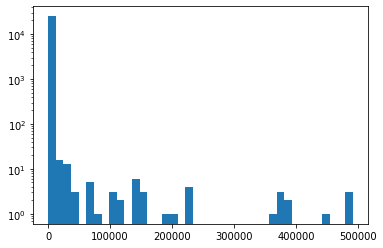

In [ ]:
import matplotlib.pyplot as plt

_ = plt.hist(column_element_counts, log=True, bins=40)

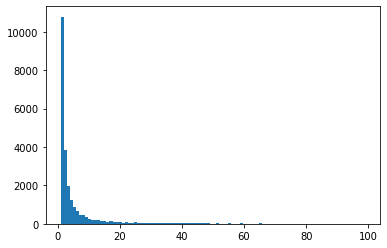

In [ ]:
_ = plt.hist(column_element_counts[column_element_counts < 100], bins=100)

Видно, что подавляющее большинство столбцов содержат очень мало ненулевых значений. Эти столбцы принесут мало пользы при поиске аномалий на новых данных, и могут даже ухудшить качество модели.

Лишь малая доля столбцов содержит больше 10 значений. Удалим столбцы, содержащие 10 значений или меньше.

In [ ]:
columns_with_few_values_condition = column_element_counts <= 10
columns_with_few_values = column_element_counts[columns_with_few_values_condition]
len(columns_with_few_values)

20862

In [ ]:
sparse_df.drop(columns_with_few_values.index, axis=1, inplace=True)
sparse_df.shape

(500016, 4032)

## Обучение модели

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(contamination=0.01, n_estimators=1000, n_jobs=-1)
prediction_isf = isf.fit_predict(sparse_df)
prediction_isf

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 1, ..., 1, 1, 1])

Результаты обучения модели имеют следующий вид.

In [ ]:
prediction_series = pd.Series(prediction_isf).replace({1: False, -1: True})
prediction_series.value_counts()

False    495343
True       4673
dtype: int64

In [ ]:
data[prediction_series]

,object_storage_id,object_storage_fullpath,src_ip,subject_account_id,subject_account_domain,event_src_host,src_asset,datafield6,day_of_week,hour,file_extension,fullpath_type,ip_version,ip_type
8,\\*\office,\d:\office\administrative department\подраздел...,10.31.8.137,s-1-5-21-1023191730-727829927-3985050192-37640,26,190,1457bbfe-f380-0001-0000-000000001469,0x100081,3,14,,windows,ipv4,private
26,missing,\missing\,missing,s-1-5-18,22,527,missing,service,2,2,,missing,missing,missing
65,\\*\office,\d:\office\administrative department\подраздел...,10.31.8.137,s-1-5-21-1023191730-727829927-3985050192-37640,26,190,1457bbfe-f380-0001-0000-000000001469,0x100081,3,14,,windows,ipv4,private
114,missing,\missing\,missing,s-1-5-18,22,164,missing,service,2,2,,missing,missing,missing
145,\\*\office,\d:\office\administrative department\подраздел...,10.31.8.137,s-1-5-21-1023191730-727829927-3985050192-37640,26,190,1457bbfe-f380-0001-0000-000000001469,0x100081,3,13,,windows,ipv4,private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499341,missing,\missing\,missing,s-1-5-18,22,456,missing,service,2,5,,missing,missing,missing
499530,\\*\office,\d:\office\administrative department\подраздел...,10.31.8.137,s-1-5-21-1023191730-727829927-3985050192-37640,26,190,1457bbfe-f380-0001-0000-000000001469,0x100081,3,12,,windows,ipv4,private
499763,missing,\missing\,missing,s-1-5-18,22,754,missing,service,2,4,,missing,missing,missing
499836,missing,\missing\,missing,s-1-5-18,22,163,missing,service,2,5,,missing,missing,missing


In [ ]:
#!pip install pyod -q
#!pip install combo -q

In [ ]:
#from pyod.models.feature_bagging import FeatureBagging

#fb = FeatureBagging(contamination=0.01)
#prediction = fb.fit_predict(data_sparse)

In [ ]:
#pd.Series(prediction).value_counts()